## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('The number of rows in the dataset is {:,}'\
      .format(df.shape[0]))

The number of rows in the dataset is 294,478


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {:,}'\
      .format(df.user_id.nunique()))

The number of unique users in the dataset is 290,584


d. The proportion of users converted.

In [5]:
users_converted = df.query("converted=='1'").user_id.nunique() / df.user_id.nunique()
print('The proportion of users converted is {:.5f}'\
      .format(users_converted))

The proportion of users converted is 0.12104


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
times = df.query("landing_page=='new_page' and group!='treatment'").shape[0] + \
df.query("landing_page!='new_page' and group=='treatment'").shape[0]
print("The number of times the new_page and treatment don't match is {:,}"\
      .format(times))

The number of times the new_page and treatment don't match is 3,893


f. Do any of the rows have missing values?

In [7]:
# Don't have missing values, all data columns have data in 29,4478
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# we delete the rows in the dataset who we cannot sure if this row truly received the new or old page
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('The number of user_ids is {:,}'.format(df2.user_id.nunique()))

The number of user_ids is 290,584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
print('Yes, there is. The number of repeated user_ids in the dataset is {:,}'.format(sum(df2.user_id.duplicated())))

Yes, there is. The number of repeated user_ids in the dataset is 1


c. What is the row information for the repeat **user_id**? 

In [12]:
# we retrieved the data of the users that is repeated
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# we delete one of the rows with a duplicate user_id
df2.drop_duplicates(subset='user_id', inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
q4a = df2.query("converted=='1'").user_id.nunique() /  df2.user_id.nunique()
print('The probability is {:.4}'.format(q4a))

The probability is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control = df2.query("group=='control'")
q4b = control.query("converted=='1'").user_id.nunique() / control.user_id.nunique()
print('The probability is {:.4}'.format(q4b))

The probability is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment = df2.query("group=='treatment'")
q4c = treatment.query("converted=='1'").user_id.nunique() / treatment.user_id.nunique()
print('The probability is {:.4}'.format(q4c))

The probability is 0.1188


d. What is the probability that an individual received the new page?

In [17]:
q4d = df2.query("landing_page=='new_page'").user_id.nunique() /  df2.user_id.nunique()
print('The probability is {:.4}'.format(q4d))

The probability is 0.5001


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

As you can see in the table below, the probability to convert in Control group (0.1204) is slightly higher than Treatment group (0.1188). In addition, the probability to an individual be part of a group Control and Treatment is almost 50%. Therefore, there is no enough evidence to afirm that new treatment page leads to more conversions and more study neets to be done to determine if really new treatment page leads to more conversions. 

| Group |Probability | Conversion | Probability |
| --- | --- | --- | --- |
| Control | **0.4999** |Converted | **0.1204** |
| --- | --- | No Converted | 0.8712 |
| Treatment | **0.5001** | Converted | **0.1188** |
| --- | --- | No Converted | 0.8812 |


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0 $$

$$H_1: p_{new} - p_{old} \gt 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
rate_pnew = df2.query("converted=='1'").user_id.nunique() / df2.user_id.nunique()
print('The conversion rate for p_new is {:.4}'.format(rate_pnew))

The conversion rate for p_new is 0.1196


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
rate_pold = df2.query("converted=='1'").user_id.nunique() / df2.user_id.nunique()
print('The conversion rate for p_old is {:.4}'.format(rate_pold))

The conversion rate for p_old is 0.1196


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = treatment.user_id.nunique()
print('The number of individuals in the treatment group is {:,}'.format(n_new))

The number of individuals in the treatment group is 145,310


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = control.user_id.nunique()
print('The number of individuals in the treatment group is {:,}'.format(n_old))

The number of individuals in the treatment group is 145,274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[1-rate_pnew, rate_pnew])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[1-rate_pold, rate_pold])
old_page_converted

array([0, 1, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
print('The difference between p_new - p_old is {:.4}'\
      .format(new_page_converted.mean() - old_page_converted.mean()))

The difference between p_new - p_old is -0.0006493


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    np_converted = np.random.choice([0,1],size=n_new,p=[1- rate_pnew, rate_pnew])
    op_converted = np.random.choice([0,1],size=n_old,p=[1 -rate_pold, rate_pold])
    np_converted = np_converted.mean()
    op_converted = op_converted.mean()
    p_diffs.append(np_converted - op_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
# the observed difference
obs_diff = q4c - q4b
obs_diff
print('The difference of probability observed in the Dataset is {:.4}'\
      .format(obs_diff))

The difference of probability observed in the Dataset is -0.001578


Text(0.5,1,'Histogram of the Difference of $p_{new}$ - $p_{old}$')

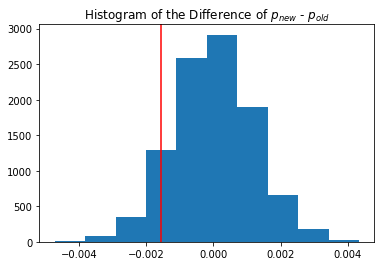

In [27]:
plt.hist(p_diffs);
plt.axvline(obs_diff, color='r')
plt.title('Histogram of the Difference of $p_{new}$ - $p_{old}$')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
p_diffs = np.array(p_diffs)
(p_diffs > obs_diff).mean()
print('The proportion of the p_diffs are greater than the actual difference observed in Datase is {:.4}'\
      .format((p_diffs > obs_diff).mean()))

The proportion of the p_diffs are greater than the actual difference observed in Datase is 0.9078


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In scientific studies, the $P_{value}$ is the level of marginal significance and represent the probability of observing and statistics.  Considering a **$P_{value}$ = 0.9026** and **$\alpha$ = 0.05**. In this analysis we obtain a $P_{value}$ greater than **$\alpha$**, so we fail to reject $H_0$ and there isn't a significant difference betweeen the convertion proportion of new pages in relation with old pages.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page' and converted=='1'").shape[0]
convert_new = df2.query("landing_page=='new_page' and converted=='1'").shape[0]
n_old = df2.query("landing_page=='old_page'").user_id.nunique()
n_new = df2.query("landing_page=='new_page'").user_id.nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print('The values obtained using stats.proportions_ztest are Z = {:.5} P-value = {:.5}'\
      .format(z_score, p_value))

The values obtained using stats.proportions_ztest are Z = -1.3109 P-value = 0.90506


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- The Z-score represent the number of standart deviations away from a point to the mean. Our **$Z_{score}$ = -1.3109** indicates that our started point of the **$P_{value}$ = 0.90506** is pointed 1.3109 standart deviation to the left from the mean and the **$P_{value}$** indicates the total area from this point to the right. 

- We are agree of findings in parts j. and k., because also the $P_{value}$ is greater than **$\alpha$**, so we fail to reject $H_0$ and there isn't a significant difference betweeen the convertion proportion of new pages in relation with old pages.  


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Considering that the column **converted** in the Dataset is Categorical and only accept conversion or no conversion, **The Logistic Regresion** fit in this case. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
# create the intercep and ab_page  column 
df2['intercept'] = 1
pd.get_dummies(df2['group'])
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('control', axis=1, inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 12 Sep 2019   Pseudo R-squ.:               8.077e-06
Time:                        19:03:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

The $P_{value}$ associated with ab_page is 0.190, while $P_{value}$ founded in Part II is 0.90506. The $P_{value}$ = 0.90506 is concerned about if one page has a higher convertion proportion in relation to the another page (new pages is relation than old pages), while  $P_{value}$ = 0.190 is concerned about if exists a relationship between variables. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- Could be a good idea to use timestamp column, could be interesting if exist a correlation of the time with make a conversion. Also the time spendend in the page before make a convertion or maybe CTR (Click Though rate). 
- Is good idea to consider other factors to the regression model because we could find out other explanatory variables that influence a convertion. 
- One disadvantage to add new factor to the regression model is multicollinearity problem. This occur when is present two explanatory variables that are strong are related, but we could delete this variables if can't pass the Variance Inflation Factor (VIIF). 
- There are another problems that can affect the model as: correlation of errors, non constant variables of erros and outliers. 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
# get the dataset countries
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [35]:
# merge the dataset s
df_merge = df2.merge(country_df, on='user_id', how='inner')
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [36]:
#all rows have data
df_merge.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
country         0
dtype: int64

In [37]:
#unique countries in the dataset 
df_merge.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [38]:
# get dummies colums and 
df_merge[['CA', 'UK', 'US']] = pd.get_dummies(df_merge['country'])
df_merge = df_merge.drop(['country', 'UK'], axis=1)
df_merge.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
log_mod2 = sm.Logit(df_merge['converted'], df_merge[['intercept', 'ab_page', 'CA', 'US']])
results2 = log_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Sep 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:03:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

In [40]:
# get results param
np.exp(results2.params)

intercept    0.138154
ab_page      0.985168
CA           0.950621
US           0.990165
dtype: float64

In [41]:
1 / np.exp(results2.params)

intercept    7.238314
ab_page      1.015056
CA           1.051944
US           1.009932
dtype: float64

- All the variables are not statiscally significant, considering an **$\alpha$ = 0.05**.
- If an individual is from UK, they are 1.052 times more likely to be a convertion than if an invidual is from CA, holding all else constant.
- If an individual is from UK, they are 1.01 times more likely to be a convertion than if an invidual is from US, holding all else constant.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0